# Chapter 7: Neural Networks

## A Simple Neural Network
### Activation Functions
##### Example 7-1. Plotting ReLu function

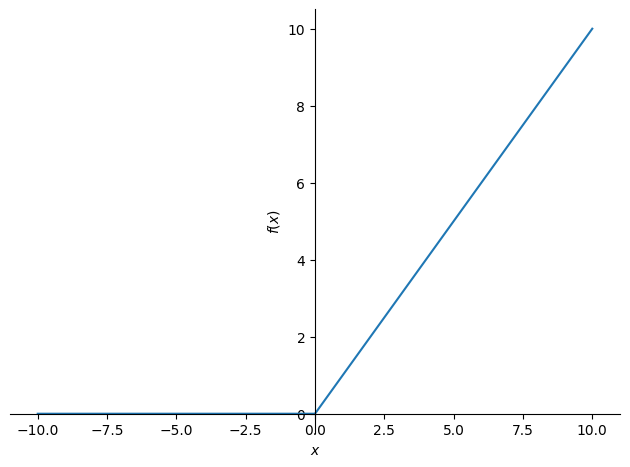

In [1]:
from sympy import *

# Plot ReLu
x = symbols('x')
relu = Max(0,x)
plot(relu)

##### Example 7-2. Logistic activation function in SymPy

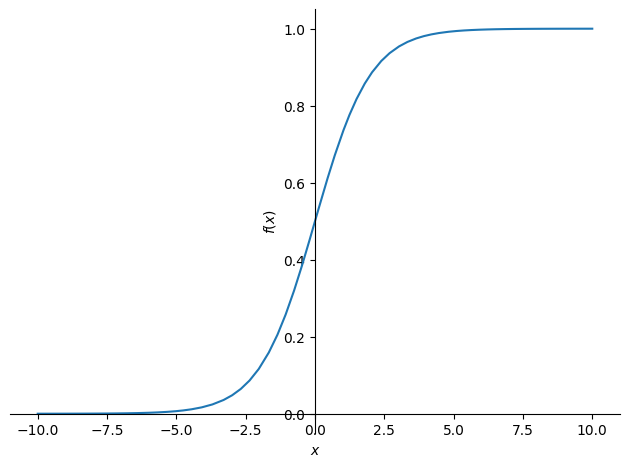

In [2]:
# Plot Logistic
x = symbols('x')
logistic = 1 / (1 + exp(-x))
plot(logistic)

### Forward Propagation
##### Example 7-3. A simple forward propagation network with random weights and biases

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr', delimiter=',')

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:,0:3].values / 255)
all_outputs = all_data.iloc[:,-1].values

# Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)
n = X_train.shape[0]

# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3,3)
w_output = np.random.rand(1,3)

b_hidden = np.random.rand(3,1)
b_output = np.random.rand(1,1)

# Activation functions
relu = lambda x: np.maximum(x,0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Accuracy: ", accuracy)

Accuracy:  0.6347438752783953


##### Example 7-4. The weight matrices and bias vectors in NumPy

In [6]:
# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3,3)
w_output = np.random.rand(1,3)

b_hidden = np.random.rand(3,1)
b_output = np.random.rand(1,1)

##### Example 7-5. The activation functions and forward propagation function for out neural network

In [14]:
# Activation functions
relu = lambda x: np.maximum(x,0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

##### Examle 7-6. Calculating accuracy

In [9]:
# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Accuracy: ", accuracy)

Accuracy:  0.6258351893095758


## Backpropagation
### Calculating the Weight and Bias Derivative
##### Example 7-7. Calculating the derivative of the cost function with respect to A2

In [2]:
A2, y = symbols('A2 y')
C = (A2 - y)**2
dC_dA2 = diff(C, A2)
print(dC_dA2)

2*A2 - 2*y


##### Example 7-8. Finding the derivative of A2 with respect to Z2

In [3]:
Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-Z2))**2

A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)
print(dA2_dZ2)

2*exp(-Z2)/(1 + exp(-Z2))**3


##### Example 7-9. Derivative of Z2 with respect to W2

In [4]:
A1, W2, B2 = symbols('A1 W2 B2')

Z2 = A1*W2 + B2
dZ2_dW2 = diff(Z2, W2)
print(dZ2_dW2)

A1


##### Example 7-10. Calculating all the partial derivatives we will need for our neural network

In [14]:
W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Calculate derivative of cost function with respect to A2
A2, y = symbols('A2 y')
C = (A2 - y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 =", dC_dA2)

# Calculate derivative of A2 with respect to Z2
logistic = lambda x: 1 / (1 + exp(-Z2))**2
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 =",dA2_dZ2)

# Calculate derivative of Z2 with respect to A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 =", dZ2_dA1)

# Calculate derivative of Z2 with respect to W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 =",dZ2_dW2)

# Calculte derivative of Z2 with respect to B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 =", dZ2_dB2)

# Calculate derivative of A1 with respect to Z1
relu = lambda x: Max(x,0)
_A1 = relu(Z1)
d_relu = lambda x: x > 0 # Slope is 1 if positive, 0 if negative
dA1_dZ1 = d_relu(Z1)
print('dA1_dZ1 =', dA1_dZ1)

# Calculate derivative of Z1 with respect to W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print('dZ1_dW1 =', dZ1_dW1)

# Calculating derivative of Z1 with respect to B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 =", dZ1_dB1)

dC_dA2 = 2*A2 - 2*y
dA2_dZ2 = 2*exp(-Z2)/(1 + exp(-Z2))**3
dZ2_dA1 = W2
dZ2_dW2 = A1
dZ2_dB2 = 1
dA1_dZ1 = Z1 > 0
dZ1_dW1 = X
dZ1_dB1 = 1


### Stochastic Gradient Descent
##### Example 7-11. Implementing a neural network using stochastic gardient descent

In [9]:
all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# Learning rate controls how slowly we approach a solution
# Make it too small, it will take too long to run
# Make it too big, it will likely overshoot and miss the solution
L = 0.05

# Extract the input columns and scale down by 255
all_inputs = (all_data.iloc[:,0:3].values / 255)
all_outputs = all_data.iloc[:,-1].values

# Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)
n = X_train.shape[0]

# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3,3)
w_output = np.random.rand(1,3)

b_hidden = np.random.rand(3,1)
b_output = np.random.rand(1,1)

# Activation functions
relu = lambda x: np.maximum(x,0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivatives of Activation functions
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x))**2

# returns slope for weights and biases using chain rule
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2*A2 - 2*Y       # These values have been
    dA2_dZ2 = d_logistic(Z2)  # copied from output of previous cell
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1
    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Execute gradient descent
for i in range(100_000):
    # randomly select on of the training data
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # run randomly selected training data throught the neural network
    Z1, A1, Z2, A2 =  forward_prop(X_sample)

    # distribute error through backpropagation and return slopes for weights and biases
    dW1, dB1, dW2, dB2 =  backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # updated wieghts and biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Accuracy: ", accuracy)

Accuracy:  0.9910913140311729


##### Example 7-12. Adding an interactive shell to out neural network

In [ ]:
# Interact and test with new colors
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > 0.5:
        return "DARK"
    else:
        return "LIGHT"

while True:
    col_input = input("Predict light or dark font. Input values R, G, B:")
    (r, g, b) =  col_input.split(',')
    print(predict_font_shade(int(r), int(g), int(b)))

## Using scikit learn
##### Example 7-13. Using scikit-learn neural network

In [13]:
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("https://bit.ly/3GsNzGt", delimiter=',')

# Extract input variables
X = (df.values[:, :-1] / 255)
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), activation='relu', max_iter=100_000, learning_rate_init=0.05)
nn.fit(X_train, Y_train)

# Print weights and biases
print(nn.coefs_)
print(nn.intercepts_)

print("Training set score:", nn.score(X_train, Y_train))
print("Testing set score:", nn.score(X_test, Y_test))

[array([[-0.77097914,  0.13805769,  3.49118848],
       [-3.68042871,  0.18068551,  5.74845645],
       [-0.50201621, -0.92689283,  1.13886516]]), array([[-5.19920473],
       [-0.22043432],
       [ 7.93808468]])]
[array([ 3.66340376, -0.85873095, -4.16636426]), array([-1.92481397])]
Training set score: 1.0
Testing set score: 0.9955456570155902
